# Demonstration: CommonRoad Input-Output
## Reading, Visualizing and Modifying CommonRoad Scenarios
We demonstrate how to read, visualize and modify a simple CommonRoad scenario. For a more detailed tutorial, please refer to [tutorial_commonroad_input-output.ipynb](https://gitlab.lrz.de/tum-cps/commonroad-search/-/blob/master/tutorials/0_commonroad_input-output/tutorial_commonroad_input-output.ipynb).

In [1]:
# set necessary paths
import sys

# add commonroad-io to python path
# sys.path.append("/home/gerald/Documents/CommonRoad/cps/commonroad-io")

# 1. Read a scenario XML file

As documented in [CommonRoadFileReader](https://commonroad-io.readthedocs.io/en/latest/api/common/), the **CommonRoadFileReader** reads in a CommonRoad XML file; its **open()** method returns a **Scenario** and a **PlanningProblemSet** object:

In [2]:
# necessary imports
import os
import matplotlib.pyplot as plt
from IPython import display

# import classes and functions for reading xml file and visualizing commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

ModuleNotFoundError: No module named 'commonroad.visualization.draw_dispatch_cr'

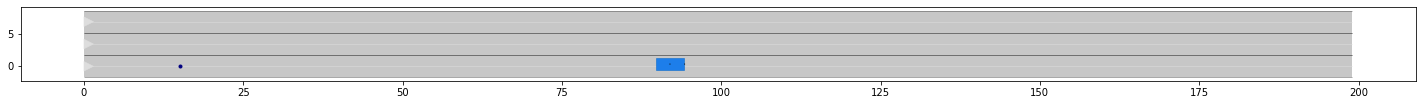

In [3]:
# generate path of the scenario
path_file = "../scenarios/tutorial/ZAM_Tutorial-1_2_T-1.xml"

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(path_file).open()


# plot the scenario for 40 time steps, here each time step corresponds to 0.1 second
for i in range(0, 40):
    # uncomment the following line to clear previous graph for better visualization
    display.clear_output(wait=True)
    
    # create figure
    plt.figure(figsize=(25, 10))
    
    # plot the scenario for each time step
    draw_object(scenario, draw_params={'time_begin': i})
    
    # plot the planning problem set
    draw_object(planning_problem_set)
    
    # show scenario
    plt.gca().set_aspect('equal')
    plt.show()

# 2. Modify scenario
## 2.1. Add a static obstacle to the scenario
We would like to add a static obstacle with the following specification:
   * **obstacle type:** parked vehicle
   * **obstacle shape:** rectangle with a width of 2.0 m and a length of 4.5 m
   * **initial state:**
        * position: (30, 3.5) m
        * orientation: 0.02 rad
        * time step: 0
   * **obstacle id:** Generate a unique ID using **generate_object_id()** of class **Scenario**

In [4]:
# necessary imports
import numpy as np

from commonroad.geometry.shape import Rectangle
from commonroad.scenario.obstacle import StaticObstacle, ObstacleType
from commonroad.scenario.trajectory import State

Create new static obstacle:

In [5]:
# generate the static obstacle according to the specification
static_obstacle_type = ObstacleType.PARKED_VEHICLE
static_obstacle_shape = Rectangle(width = 2.0, length = 4.5)
static_obstacle_initial_state = State(position = np.array([30.0, 3.5]), 
                                      orientation = 0.02, time_step = 0)
static_obstacle_id = scenario.generate_object_id()

# construct a static obstacle
static_obstacle = StaticObstacle(static_obstacle_id, static_obstacle_type, 
                                 static_obstacle_shape, static_obstacle_initial_state)

# add the static obstacle to the scenario
scenario.add_objects(static_obstacle)

Visualize the new scenario:

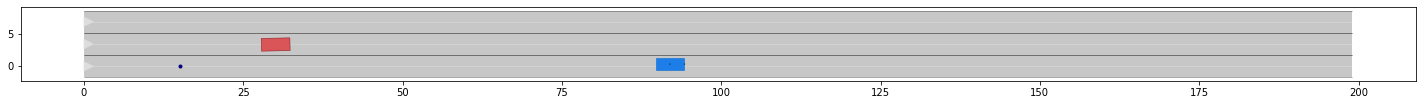

In [7]:
# plot the scenario for each time step
for i in range(0, 40):
    # uncomment to clear previous graph
    display.clear_output(wait=True)
    plt.figure(figsize=(25, 10))
    draw_object(scenario, draw_params={'time_begin': i})
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()

## 2.2. Add a dynamic obstacle (car) to the scenario
We would like to add a dynamic obstacle with the following specification:
   * **obstacle type:** car
   * **obstacle shape:** rectangle with a width of 1.8 m and a length of 4.3 m
   * **initial state:**
        * position: (50, 0.0) m
        * orientation: 0.00 rad
        * velocity: 22 m/s
        * time step: 0
   * **obstacle id:** Generate a unique ID using **generate_object_id()** of class **Scenario**
   * **prediction:** Trajectory prediction

In [9]:
# necessary imports
from commonroad.scenario.obstacle import DynamicObstacle
from commonroad.scenario.trajectory import Trajectory
from commonroad.prediction.prediction import TrajectoryPrediction

Create the specifications for a new dynamic obstacle:

In [12]:
# generate dynamic obstacle according to specification
dynamic_obstacle_type = ObstacleType.CAR
dynamic_obstacle_shape = Rectangle(width = 1.8, length = 4.3)
dynamic_obstacle_initial_state = State(position = np.array([50.0, 0.0]), 
                                       velocity = 22,
                                       orientation = 0.0, 
                                       time_step = 0)
dynamic_obstacle_id = scenario.generate_object_id()

Generate a trajectory prediction for the dynamic obstacle:

In [14]:
# generate the states of the obstacle for time steps 1 to 40
state_list = []
for i in range(1, 40):
    # compute new position, here scenario.dt = 0.1 s
    new_position = np.array([dynamic_obstacle_initial_state.position[0] + 
                             scenario.dt * i * 22, 0])
    # create new state
    new_state = State(position = new_position, velocity = 22,
                      orientation = 0.02, time_step = i)
    # add new state to state_list
    state_list.append(new_state)
    
# create the trajectory of the obstacle starting at time step 1
dynamic_obstacle_trajectory = Trajectory(1, state_list)

# create the prediction using the trajectory and the shape of the vehicle
dynamic_obstacle_prediction = TrajectoryPrediction(dynamic_obstacle_trajectory, 
                                                   dynamic_obstacle_shape)

Create the new dynamic obstacle:

In [15]:
# construct a dynamic obstacle
dynamic_obstacle = DynamicObstacle(dynamic_obstacle_id, 
                                   dynamic_obstacle_type, 
                                   dynamic_obstacle_shape, 
                                   dynamic_obstacle_initial_state, 
                                   dynamic_obstacle_prediction)

# add dynamic obstacle to the scenario
scenario.add_objects(dynamic_obstacle)

Visualize the new scenario:

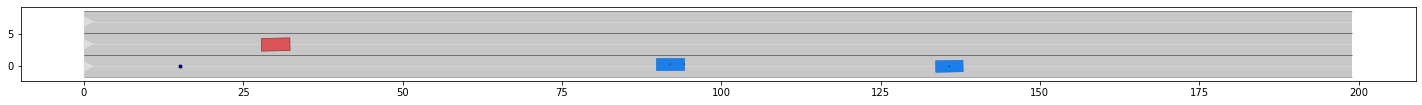

In [18]:
# plot the scenario for each time step
for i in range(0, 40):
    # uncomment to clear previous graph
    display.clear_output(wait=True)
    plt.figure(figsize=(25, 10))
    draw_object(scenario, draw_params={'time_begin': i})
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()